<a href="https://colab.research.google.com/github/muroo123/python/blob/main/WebCrawling_section3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

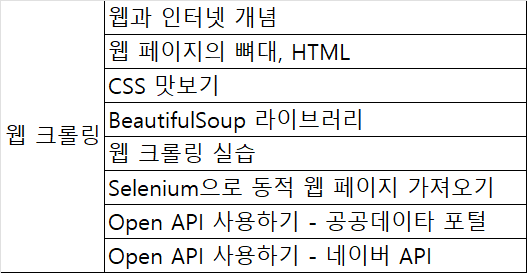

## Open API - 공공데이타 포털(한국환경공단 측정소정보)

- www.data.go.kr
- 카카오톡, 네이버 계정으로 가입 가능
- 한국환경공단 자료 신청(측정소정보, 대기오염정보)
- 마이페이지 -> API신청 -> 한국환경공단_에어코리아_측정소정보
- 서비스정보 -> 참고문헌 파일에 상세 설명 있음
- 서비스정보 -> 일반 인증키(Encoding)에 있는 문자열이 개인 신청한 서비스키
- 활용신청 상세기능정보 -> 측정소 목록 조회 -> 미리보기 확인에서 sample 데이타 조회 가능

### 한국환경공단_에어코리아_측정소정보
- https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15073877

In [ ]:
# [1] urlopen, BeautifulSoup 라이브러리를 가져오기
from urllib.request import urlopen
from bs4 import BeautifulSoup


## 요청 메세지 확인하기
- 다운받은 파일에서 한국환경공단_에어코리아_측정소정보_기술문서_v1.2.docx 찾기
- 파일 8페이지에 요청/응답 메세지 예제에서 요청메세지 확인
- http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getMsrstnList?addr=서울&stationName=종로구&pageNo=1&numOfRows=10&serviceKey=서비스키&returnType=xml
- 요청메세지 변수에 값을 채워서 url 완성 후 페이지 요청하기


In [ ]:
# [2] api 요청변수 채우기
# 주소
addr        = '서울'
# 측정소명
stationName = '' #종로구
# 페이지번호
pageNo      = 1
# 한 페이지 결과 수
numOfRows   = 10
# serviceKey 공공데이터포털에서 받은 인증키(URL Encode)
serviceKey =  'mbEFdDMAXvjlftXV%2FBIqkcIRq6HI9BtxkW%2FHP%2BpSUkjfdl1qWrgf8qX7DIS%2BJ1TEIIu5JYmYbrCeYZ68XLlI%2FA%3D%3D'
# xml 또는 json
returnType  = 'xml'


In [ ]:
# [3] url 만들기 입니다. f스트링을 활용해 중괄호 쳐진 부분에 각 변수가 들어가도록 합니다.

url = f'http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/'\
    f'getMsrstnList?addr={addr}&'\
    f'stationName={stationName}&'\
    f'pageNo={pageNo}&'\
    f'numOfRows={numOfRows}&'\
    f'serviceKey={serviceKey}&'\
    f'returnType={returnType}'

print(url)

http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getMsrstnList?addr=서울&stationName=&pageNo=1&numOfRows=10&serviceKey=mbEFdDMAXvjlftXV%2FBIqkcIRq6HI9BtxkW%2FHP%2BpSUkjfdl1qWrgf8qX7DIS%2BJ1TEIIu5JYmYbrCeYZ68XLlI%2FA%3D%3D&returnType=xml


In [ ]:
# [3-1] url 만들기 입니다. 서비스key만 입력해도 됩니다.
url = f'http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getMsrstnList?addr=서울&stationName=종로구&pageNo=1&numOfRows=10&serviceKey={serviceKey}&returnType=xml'
print(url)

http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getMsrstnList?addr=서울&stationName=종로구&pageNo=1&numOfRows=10&serviceKey=mbEFdDMAXvjlftXV%2FBIqkcIRq6HI9BtxkW%2FHP%2BpSUkjfdl1qWrgf8qX7DIS%2BJ1TEIIu5JYmYbrCeYZ68XLlI%2FA%3D%3D&returnType=xml


In [ ]:
# [4] urlopen을 사용하여 url을 가져옵니다.
result = urlopen(url)


UnicodeEncodeError: 'ascii' codec can't encode characters in position 52-53: ordinal not in range(128)

In [ ]:
# [4-1] 해결1UnicodeEncodeError: 'ascii' codec can't encode characters in position 발생시
# 원인 : 아스키 코드가 한글을 받아들이지 못해 생기는 문제
#        인코딩 방법 변경 아스키 코드 -> URL 형식(페센트(%) 인코딩) 인코딩
# 해결 : 변수를 urllib.parse.quote()함수를 사용하여 인코딩 변경

from urllib.parse import quote

# 한글데이타가 있는 api 요청변수에 quote() 사용하기
addr        = quote('서울')
stationName = quote('')

# url 만들기 입니다.
url = f'http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/'\
    f'getMsrstnList?addr={addr}&'\
    f'stationName={stationName}&'\
    f'pageNo={pageNo}&'\
    f'numOfRows={numOfRows}&'\
    f'serviceKey={serviceKey}&'\
    f'returnType={returnType}'

print(url)

result = urlopen(url)

http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getMsrstnList?addr=%EC%84%9C%EC%9A%B8&stationName=&pageNo=1&numOfRows=10&serviceKey=mbEFdDMAXvjlftXV%2FBIqkcIRq6HI9BtxkW%2FHP%2BpSUkjfdl1qWrgf8qX7DIS%2BJ1TEIIu5JYmYbrCeYZ68XLlI%2FA%3D%3D&returnType=xml


In [ ]:
# [4-2] 해결1UnicodeEncodeError: 'ascii' codec can't encode characters in position 발생시
# 원인 : 아스키 코드가 한글을 받아들이지 못해 생기는 문제
#        HTTP 라이브러리 requests를 사용하여 자동 인코딩하는 방법
# 해결 : requests.get(url)함수의 content가 데이터를 아스키 코드로 변환해 줌

import requests
result = requests.get(url).content
print(result)

b'<?xml version="1.0" encoding="UTF-8"?>\r\n<response>\n  <header>\n    <resultCode>00</resultCode>\n    <resultMsg>NORMAL_CODE</resultMsg>\n  </header>\n  <body>\n    <items>\n      <item>\n        <dmX>37.564639</dmX>\n        <item>SO2, CO, O3, NO2, PM10, PM2.5</item>\n        <mangName>\xeb\x8f\x84\xec\x8b\x9c\xeb\x8c\x80\xea\xb8\xb0</mangName>\n        <year>1995</year>\n        <addr>\xec\x84\x9c\xec\x9a\xb8 \xec\xa4\x91\xea\xb5\xac \xeb\x8d\x95\xec\x88\x98\xea\xb6\x81\xea\xb8\xb8 15 \xec\x8b\x9c\xec\xb2\xad\xec\x84\x9c\xec\x86\x8c\xeb\xac\xb8\xeb\xb3\x84\xea\xb4\x80 3\xeb\x8f\x99</addr>\n        <stationName>\xec\xa4\x91\xea\xb5\xac</stationName>\n        <dmY>126.975961</dmY>\n      </item>\n      <item>\n        <dmX>37.549389</dmX>\n        <item>SO2, CO, O3, NO2, PM10, PM2.5</item>\n        <mangName>\xeb\x8f\x84\xeb\xa1\x9c\xeb\xb3\x80\xeb\x8c\x80\xea\xb8\xb0</mangName>\n        <year>1996</year>\n        <addr>\xec\x84\x9c\xec\x9a\xb8 \xec\x9a\xa9\xec\x82\xb0\xea\xb5\xac \

In [ ]:
# [5] BeautifulSoup를 사용하여 xml 파일을 파싱
soup = BeautifulSoup(result, 'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<response>
 <header>
  <resultCode>
   00
  </resultCode>
  <resultMsg>
   NORMAL_CODE
  </resultMsg>
 </header>
 <body>
  <items>
   <item>
    <dmX>
     37.564639
    </dmX>
    <item>
     SO2, CO, O3, NO2, PM10, PM2.5
    </item>
    <mangName>
     도시대기
    </mangName>
    <year>
     1995
    </year>
    <addr>
     서울 중구 덕수궁길 15 시청서소문별관 3동
    </addr>
    <stationName>
     중구
    </stationName>
    <dmY>
     126.975961
    </dmY>
   </item>
   <item>
    <dmX>
     37.549389
    </dmX>
    <item>
     SO2, CO, O3, NO2, PM10, PM2.5
    </item>
    <mangName>
     도로변대기
    </mangName>
    <year>
     1996
    </year>
    <addr>
     서울 용산구 한강대로 405 (서울역 앞)
    </addr>
    <stationName>
     한강대로
    </stationName>
    <dmY>
     126.971519
    </dmY>
   </item>
   <item>
    <dmX>
     37.572025
    </dmX>
    <item>
     SO2, CO, O3, NO2, PM10, PM2.5
    </item>
    <mangName>
     도시대기
    </mangName>
    <year>
     1997
    </year>
  

In [ ]:
# [6] XML파일에서 쓸모있는 데이터들은 모두 item태그에 있기 때문에 find_all 메서드를 사용하여 item태그를 가져옵니다.
item = soup.find_all('item')
# 총 데이타 확인
print(len(item))


20


In [ ]:
# [7] 첫번째 데이타 확인
print(item[0])

<item>
<dmX>37.564639</dmX>
<item>SO2, CO, O3, NO2, PM10, PM2.5</item>
<mangName>도시대기</mangName>
<year>1995</year>
<addr>서울 중구 덕수궁길 15 시청서소문별관 3동</addr>
<stationName>중구</stationName>
<dmY>126.975961</dmY>
</item>


In [ ]:
# [7] 두번째 데이타 확인
print(item[1])

<item>SO2, CO, O3, NO2, PM10, PM2.5</item>


In [ ]:
# [8] 반복문으로 전체 데이타 뽑아내기
# <item> </item> 사이에 <item>SO2, CO, O3, NO2, PM10, PM2.5</item> 데이타가 있어
# find_all('item')으로 데이타 뽑아내서 중복 됨.
# 중복데이타 제외하고 딕셔너리로 생성

for idx in range(0,len(item)-1,2):
    item_dict= {}
    item_dict['dmX'] = item[idx].find('dmX').text
    item_dict['mangName'] = item[idx].find('mangName').text
    item_dict['year'] = item[idx].find('year').text
    item_dict['addr'] = item[idx].find('addr').text
    item_dict['stationName'] = item[idx].find('stationName').text
    item_dict['dmY'] = item[idx].find('dmY').text
    print(item_dict)




{'dmX': '37.564639', 'mangName': '도시대기', 'year': '1995', 'addr': '서울 중구 덕수궁길 15 시청서소문별관 3동', 'stationName': '중구', 'dmY': '126.975961'}
{'dmX': '37.549389', 'mangName': '도로변대기', 'year': '1996', 'addr': '서울 용산구 한강대로 405 (서울역 앞)', 'stationName': '한강대로', 'dmY': '126.971519'}
{'dmX': '37.572025', 'mangName': '도시대기', 'year': '1997', 'addr': '서울 종로구 종로35가길 19 종로5,6가 동 주민센터', 'stationName': '종로구', 'dmY': '127.005028'}
{'dmX': '37.56865', 'mangName': '도로변대기', 'year': '1994', 'addr': '서울 중구 청계천로 184 (청계천4가사거리 남강빌딩 앞)', 'stationName': '청계천로', 'dmY': '126.998083'}
{'dmX': '37.570633', 'mangName': '도로변대기', 'year': '2008', 'addr': '서울 종로구 종로 169 (종묘주차장 앞)', 'stationName': '종로', 'dmY': '126.996783'}
{'dmX': '37.532057', 'mangName': '도시대기', 'year': '1984', 'addr': '서울특별시 용산구 이태원로 224-19 (한남동) 한남로 복합문화센터', 'stationName': '용산구', 'dmY': '127.002371'}
{'dmX': '37.544639', 'mangName': '도시대기', 'year': '1980', 'addr': '서울특별시 광진구 광나루로 571 구의 아리수정수센터', 'stationName': '광진구', 'dmY': '127.095706'}
{'dmX': '37.542

In [ ]:
# [9] 필요한 데이타만 뽑아서 데이타셋으로 만들기

import pandas as pd
df = pd.DataFrame()
for idx in range(0,len(item)-1,2):
    item_dict= {}
    item_dict['region'] = addr
    item_dict['stationName'] = item[idx].find('stationName').text
    item_dict['year'] = item[idx].find('year').text
    item_dict['addr'] = item[idx].find('addr').text
    item_dict['mangName'] = item[idx].find('mangName').text
    df2 = pd.DataFrame(item_dict, index=[idx])
    df = pd.concat([df,df2], ignore_index=True)
print(df)



  region stationName  year                                    addr mangName
0     서울          중구  1995                서울 중구 덕수궁길 15 시청서소문별관 3동     도시대기
1     서울        한강대로  1996                 서울 용산구 한강대로 405 (서울역 앞)    도로변대기
2     서울         종로구  1997          서울 종로구 종로35가길 19 종로5,6가 동 주민센터     도시대기
3     서울        청계천로  1994        서울 중구 청계천로 184 (청계천4가사거리 남강빌딩 앞)    도로변대기
4     서울          종로  2008                 서울 종로구 종로 169 (종묘주차장 앞)    도로변대기
5     서울         용산구  1984  서울특별시 용산구 이태원로 224-19 (한남동) 한남로 복합문화센터     도시대기
6     서울         광진구  1980           서울특별시 광진구 광나루로 571 구의 아리수정수센터     도시대기
7     서울         성동구  1982              서울 성동구 뚝섬로3길 18 성수1가1동주민센터     도시대기
8     서울        강변북로  2009                서울 성동구 강변북로 257 한강사업본부 옆    도로변대기
9     서울         중랑구  1984                서울 중랑구 용마산로 369 건강가정지원센터     도시대기


In [ ]:
# [10] csv 파일로 만들기
df.to_csv('out.csv', index=False, encoding='cp949')
